In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv(r"C:\Users\KIIT\Desktop\1\RoadAccidentsInIndia\ModifiedDatabase\laneAccidents.csv")
df.head()


,S.No,State/UT,Single Lane - Accident - 2014,Single Lane - Accident - 2014 per 1L people,Single Lane - Killed - 2014,Single Lane - Killed - 2014 per 1L people,Single Lane - Injured - 2014,Single Lane - Injured - 2014 per 1L people,Two Lanes - Accident - 2014,Two Lanes - Accident - 2014 per 1L people,...,3 Lanes or more w.o Median - Killed - 2014 per 1L people,3 Lanes or more w.o Median - Injured - 2014,3 Lanes or more w.o Median - Injured - 2014 per 1L people,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Accident - 2014 per 1L people,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Killed - 2014 per 1L people,4 Lanes with Median - Injured - 2014,4 Lanes with Median - Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,8634.0,16.473750,2958.0,5.643891,13541.0,25.836350,10327.0,19.704009,...,0.755572,1199.0,2.287703,4291.0,8.187267,1560.0,2.976494,5069.0,9.671698,52410653
1,2,Arunachal Pradesh,90.0,6.504173,60.0,4.336115,152.0,10.984826,115.0,8.310888,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1383727
2,3,Assam,3888.0,12.459312,1217.0,3.899944,3195.0,10.238555,2432.0,7.793479,...,0.080114,42.0,0.134591,768.0,2.461099,245.0,0.785116,752.0,2.409826,31205576
3,4,Bihar,3731.0,3.584073,1815.0,1.743525,2475.0,2.377534,4156.0,3.992336,...,0.374642,485.0,0.465901,913.0,0.877046,612.0,0.587899,588.0,0.564844,104099452
4,5,Chhattisgarh,7961.0,31.164370,2244.0,8.784430,7762.0,30.385359,4696.0,18.383103,...,0.000000,0.0,0.000000,1164.0,4.556629,254.0,0.994316,734.0,2.873338,25545198


In [13]:

df.columns = df.columns.map(lambda c: c.strip() if isinstance(c, str) else c)

accident_cols = [c for c in df.columns if isinstance(c, str) and "accident - 2014" in c.lower()]
injured_cols  = [c for c in df.columns if isinstance(c, str) and "injured - 2014" in c.lower()]
killed_cols   = [c for c in df.columns if isinstance(c, str) and "killed - 2014" in c.lower()]

if not (accident_cols and injured_cols and killed_cols):
    print("Warning: some expected column groups were not found.")
    print("accident_cols:", accident_cols)
    print("injured_cols:", injured_cols)
    print("killed_cols:", killed_cols)


df["Total_Accidents"] = df[accident_cols].fillna(0).sum(axis=1) if accident_cols else 0
df["Total_Injured"]   = df[injured_cols].fillna(0).sum(axis=1) if injured_cols else 0
df["Total_Killed"]    = df[killed_cols].fillna(0).sum(axis=1) if killed_cols else 0

df[["State/UT","Total_Accidents","Total_Injured","Total_Killed"]].head()


,State/UT,Total_Accidents,Total_Injured,Total_Killed
0,Andhra Pradesh,24486.631741,29988.108619,7923.088536
1,Arunachal Pradesh,219.815061,330.258726,127.599962
2,Assam,7166.893344,6519.826406,2530.081889
3,Bihar,9565.179683,6646.378516,4917.719525
4,Chhattisgarh,13875.104102,13208.504788,4037.744642


In [14]:

df["Total_Accidents"] = pd.to_numeric(df["Total_Accidents"], errors='coerce').fillna(0)
df["Total_Injured"]   = pd.to_numeric(df["Total_Injured"], errors='coerce').fillna(0)
df["Total_Killed"]    = pd.to_numeric(df["Total_Killed"], errors='coerce').fillna(0)

df["Severity_Index"] = (
    0.5 * df["Total_Killed"] +
    0.3 * df["Total_Injured"] +
    0.2 * df["Total_Accidents"]
)
df["Severity_Index"] = df["Severity_Index"].round(2)


df[["State/UT","Total_Accidents","Total_Injured","Total_Killed","Severity_Index"]].head()


,State/UT,Total_Accidents,Total_Injured,Total_Killed,Severity_Index
0,Andhra Pradesh,24486.631741,29988.108619,7923.088536,17855.30
1,Arunachal Pradesh,219.815061,330.258726,127.599962,206.84
2,Assam,7166.893344,6519.826406,2530.081889,4654.37
3,Bihar,9565.179683,6646.378516,4917.719525,6365.81
4,Chhattisgarh,13875.104102,13208.504788,4037.744642,8756.44


In [15]:
# ---- Cell 3: Compute totals and prepare Severity_Index ----
accident_cols = [col for col in df.columns if "Accident - 2014" in col]
injured_cols  = [col for col in df.columns if "Injured - 2014" in col]
killed_cols   = [col for col in df.columns if "Killed - 2014" in col]

print("Found columns:", len(accident_cols), "accident cols,", len(injured_cols), "injured cols,", len(killed_cols), "killed cols")

# Compute totals per row (state)
df['Total_Accidents'] = df[accident_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df['Total_Injured']   = df[injured_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df['Total_Killed']    = df[killed_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Compute Severity_Index using sensible weights (tweakable)
df['Severity_Index'] = (0.5 * df['Total_Killed'] +
                        0.3 * df['Total_Injured'] +
                        0.2 * df['Total_Accidents']).round(3)

# Quick sanity checks
print("Totals head:")
display(df[['State/UT','Total_Accidents','Total_Injured','Total_Killed','Severity_Index']].head())
print("Any NaNs in totals?", df[['Total_Accidents','Total_Injured','Total_Killed']].isna().any().to_dict())

Found columns: 8 accident cols, 8 injured cols, 8 killed cols
Totals head:


,State/UT,Total_Accidents,Total_Injured,Total_Killed,Severity_Index
0,Andhra Pradesh,24486.631741,29988.108619,7923.088536,17855.303
1,Arunachal Pradesh,219.815061,330.258726,127.599962,206.841
2,Assam,7166.893344,6519.826406,2530.081889,4654.368
3,Bihar,9565.179683,6646.378516,4917.719525,6365.809
4,Chhattisgarh,13875.104102,13208.504788,4037.744642,8756.445


Any NaNs in totals? {'Total_Accidents': False, 'Total_Injured': False, 'Total_Killed': False}


In [16]:
# ---- Cell 4: Create Severity_Level labels (quantile + KMeans fallback) and check imbalance ----
from sklearn.cluster import KMeans

# Quantile thresholds
p33 = df['Severity_Index'].quantile(0.33)
p66 = df['Severity_Index'].quantile(0.66)
print("Quantile thresholds p33, p66:", p33, p66)

def severity_label_q(v):
    if v <= p33:
        return 'Low'
    elif v <= p66:
        return 'Medium'
    else:
        return 'High'
df['Severity_Level_q'] = df['Severity_Index'].apply(severity_label_q)

# KMeans clustering on index to handle skew/outliers
si_vals = df[['Severity_Index']].fillna(0).values
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(si_vals)
centers = kmeans.cluster_centers_.flatten()
order = {c:i for i,c in enumerate(sorted(range(len(centers)), key=lambda x: centers[x]))}
df['Severity_Cluster'] = [order[c] for c in clusters]
label_map = {0:'Low', 1:'Medium', 2:'High'}
df['Severity_Level_km'] = df['Severity_Cluster'].map(label_map)

# Compare distributions
print("Quantile counts:\n", df['Severity_Level_q'].value_counts())
print("KMeans counts:\n", df['Severity_Level_km'].value_counts(normalize=False))

# Pick final label automatically: if quantile produced extreme imbalance, use KMeans
qc = df['Severity_Level_q'].value_counts(normalize=True)
if qc.get('High', 0) > 0.85:   # if >85% are High in quantile binning, it's broken -> use KMeans
    df['Severity_Level'] = df['Severity_Level_km']
    print("Using KMeans-based labels due to extreme quantile imbalance.")
else:
    df['Severity_Level'] = df['Severity_Level_q']
    print("Using quantile-based labels.")

print("Final Severity_Level counts:\n", df['Severity_Level'].value_counts())
display(df[['State/UT','Severity_Index','Severity_Level']].sort_values('Severity_Index', ascending=False).head(10))

Quantile thresholds p33, p66: 640.2462 8392.115160000003
Quantile counts:
 Severity_Level_q
High      13
Low       12
Medium    12
Name: count, dtype: int64
KMeans counts:
 Severity_Level_km
Low       26
Medium    10
High       1
Name: count, dtype: int64
Using quantile-based labels.
Final Severity_Level counts:
 Severity_Level
High      13
Low       12
Medium    12
Name: count, dtype: int64


,State/UT,Severity_Index,Severity_Level
36,Total,310735.160,High
23,Tamil Nadu,44423.989,High
13,Madhya Pradesh,31622.882,High
11,Karnataka,31068.670,High
14,Maharashtra,30890.865,High
12,Kerala,21674.388,High
27,Uttar Pradesh,21061.936,High
21,Rajasthan,18332.705,High
0,Andhra Pradesh,17855.303,High
6,Gujarat,15493.392,High


In [17]:
# ---- Cell 6: Train models (Logistic Regression and Random Forest) ----
# NOTE: LabelEncoder and StandardScaler are imported in earlier cells — avoid re-importing.

# Ensure target `y` exists; if not, create from df
if 'y' not in globals():
    if 'df' in globals() and 'Severity_Level' in df.columns:
        y = df['Severity_Level'].astype(str).copy()
    else:
        raise NameError("y is not defined and df['Severity_Level'] is not available. Run the feature construction cell first.")

# Label encode the target
le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Label classes:", list(le.classes_))

# Ensure feature matrix exists
if 'X_final' not in globals():
    if 'X' in globals():
        X_final = X.copy()
    elif 'df' in globals():
        # Construct X_final from df so this training cell can run even if
        # the feature-construction cell below hasn't been executed yet.
        drop_cols = ['S.No', 'State/UT', 'Severity_Level', 'Severity_Level_q', 'Severity_Level_km', 'Severity_Index']
        X = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore').copy()

        # Convert numeric-like object columns to numeric where possible
        for col in X.columns:
            if X[col].dtype == 'O':
                cleaned = X[col].astype(str).str.replace(',', '').str.strip()
                coerced = pd.to_numeric(cleaned.replace('', np.nan), errors='coerce')
                # If majority coerces to numeric, accept it
                if coerced.notna().sum() >= 0.6 * len(coerced):
                    X[col] = coerced
                else:
                    X[col] = X[col].astype(str).fillna('NA')

        # Impute numeric columns with median (use pandas to avoid re-importing)
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        cat_cols = [c for c in X.columns if c not in numeric_cols]

        if numeric_cols:
            X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

        # One-hot encode remaining categorical columns
        if cat_cols:
            X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

        X_final = X.copy()
        print("Constructed X_final from df inside training cell.")
    else:
        raise NameError("X_final (or X) not defined and df is not available. Run the feature construction cell first.")

# Train-test split (stratify to maintain class proportions)
# For tiny datasets, consider using Leave-One-Out or K-Fold CV instead
X_train, X_test, y_train, y_test = train_test_split(X_final, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

print("Train/test shapes:", X_train.shape, X_test.shape)
print("Train class distribution:", pd.Series(y_train).value_counts().to_dict())
print("Test class distribution:", pd.Series(y_test).value_counts().to_dict())

# Scaling for logistic regression (trees don't need scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression with strong L2 regularization to reduce overfitting
log_model = LogisticRegression(max_iter=2000, C=0.1, class_weight='balanced', random_state=42, penalty='l2')
try:
    log_model.fit(X_train_scaled, y_train)
    log_trained = True
except Exception as e:
    print(f"LogisticRegression training failed: {e}")
    log_trained = False

# Random Forest with constraints to reduce overfitting:
rf_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)
try:
    rf_model.fit(X_train, y_train)
    rf_trained = True
except Exception as e:
    print(f"RandomForest training failed: {e}")
    rf_trained = False

models = {}
if log_trained:
    models['LogisticRegression'] = log_model
if rf_trained:
    models['RandomForest'] = rf_model
    
print("Successfully trained models:", list(models.keys()))
print("\n⚠️ NOTE: Models are regularized to prevent overfitting on small dataset")

Label classes: ['High', 'Low', 'Medium']
Train/test shapes: (29, 29) (8, 29)
Train class distribution: {0: 10, 2: 10, 1: 9}
Test class distribution: {1: 3, 0: 3, 2: 2}
Successfully trained models: ['LogisticRegression', 'RandomForest']

⚠️ NOTE: Models are regularized to prevent overfitting on small dataset


In [18]:
# ---- Cell 5: Build features X_final and ensure no leakage ----
from sklearn.impute import SimpleImputer

drop_cols = ['S.No', 'State/UT', 'Severity_Level', 'Severity_Level_q', 'Severity_Level_km', 'Severity_Index']
X = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore').copy()
y = df['Severity_Level'].astype(str).copy()

print("Columns dropped for leakage protection:", drop_cols)
print("Remaining columns (first 30):", X.columns.tolist()[:30])

# Convert numeric-like object columns to numeric where possible
for col in X.columns:
    if X[col].dtype == 'O':
        cleaned = X[col].astype(str).str.replace(',', '').str.strip()
        coerced = pd.to_numeric(cleaned.replace('', np.nan), errors='coerce')
        # If majority coerces to numeric, accept it
        if coerced.notna().sum() >= 0.6 * len(coerced):
            X[col] = coerced
        else:
            X[col] = X[col].astype(str).fillna('NA')

# Impute missing numeric values with median BEFORE one-hot encoding
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in numeric_cols]

print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)

# Impute numeric columns with median
imputer = SimpleImputer(strategy='median')
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# One-hot encode remaining categorical columns
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_final = X.copy()
print("Final feature matrix shape:", X_final.shape)
print("Any NaN left?", X_final.isna().sum().sum())

# Sanity check: make sure none of the feature names contain 'Severity' or 'Severity_Index'
leak_cols = [c for c in X_final.columns if 'Severity' in c or 'severity' in c]
print("Columns containing 'Severity' substring (should be empty):", leak_cols)

Columns dropped for leakage protection: ['S.No', 'State/UT', 'Severity_Level', 'Severity_Level_q', 'Severity_Level_km', 'Severity_Index']
Remaining columns (first 30): ['Single Lane - Accident - 2014', 'Single Lane - Accident - 2014 per 1L people', 'Single Lane - Killed - 2014', 'Single Lane - Killed - 2014 per 1L people', 'Single Lane - Injured - 2014', 'Single Lane - Injured - 2014 per 1L people', 'Two Lanes - Accident - 2014', 'Two Lanes - Accident - 2014 per 1L people', 'Two Lanes - Killed - 2014', 'Two Lanes - Killed - 2014 per 1L people', 'Two Lanes - Injured - 2014', 'Two Lanes - Injured - 2014 per 1L people', '3 Lanes or more w.o Median - Accident - 2014', '3 Lanes or more w.o Median - Accident - 2014 per 1L people', '3 Lanes or more w.o Median - Killed - 2014', '3 Lanes or more w.o Median - Killed - 2014 per 1L people', '3 Lanes or more w.o Median - Injured - 2014', '3 Lanes or more w.o Median - Injured - 2014 per 1L people', '4 Lanes with Median - Accident - 2014', '4 Lanes w


== LogisticRegression ==
Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       1.00      0.67      0.80         3
      Medium       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.89      0.89      0.87         8
weighted avg       0.92      0.88      0.88         8



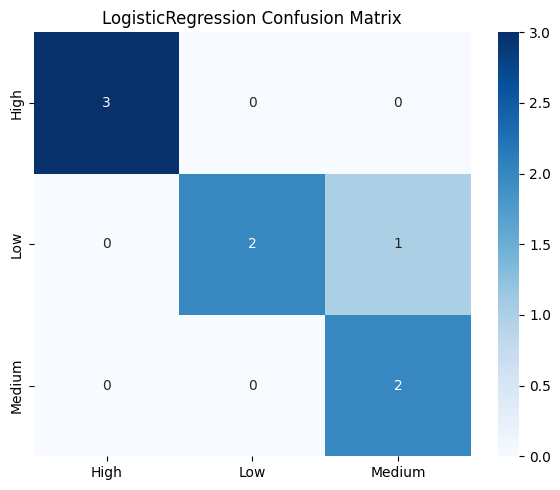

Predicted class distribution (test): {'Medium': 0.375, 'High': 0.375, 'Low': 0.25}

== RandomForest ==
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       1.00      1.00      1.00         3
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



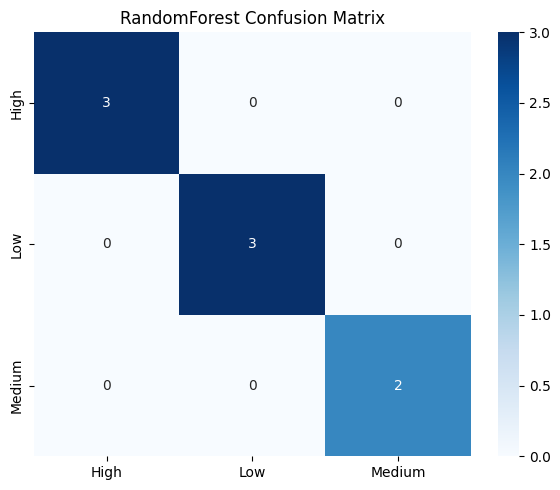

Predicted class distribution (test): {'Low': 0.375, 'High': 0.375, 'Medium': 0.25}

=== Full Dataset Predictions (Random Forest) ===


,State/UT,Severity_Level,Predicted_Severity
0,Andhra Pradesh,High,High
1,Arunachal Pradesh,Low,Low
2,Assam,Medium,Medium
3,Bihar,Medium,Medium
4,Chhattisgarh,High,High
5,Goa,Medium,Medium
6,Gujarat,High,High
7,Haryana,Medium,Medium
8,Himachal Pradesh,Medium,Medium
9,Jammu & Kashmir,Medium,Medium


In [19]:
# ---- Cell 7: Evaluation (use proper held-out test set) ----
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, model_name):
    """Evaluate a single model on test set"""
    try:
        if model_name == 'LogisticRegression':
            Xte = X_test_scaled
        else:
            Xte = X_test
        
        y_pred = model.predict(Xte)
        acc = accuracy_score(y_test, y_pred)
        print(f"\n== {model_name} ==")
        print(f"Accuracy: {acc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=le.classes_))
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.title(f"{model_name} Confusion Matrix")
        plt.tight_layout()
        plt.show()
        
        # Show predicted class distribution on test set
        pred_dist = pd.Series(y_pred).map(lambda v: le.classes_[v]).value_counts(normalize=True)
        print("Predicted class distribution (test):", pred_dist.to_dict())
    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")

# Evaluate both models
for model_name in models:
    evaluate_model(models[model_name], model_name)

# Save predictions back to df for the whole dataset if you want (but do NOT use that for accuracy)
if rf_trained:
    df['Predicted_Severity'] = le.inverse_transform(rf_model.predict(X_final))
    print("\n=== Full Dataset Predictions (Random Forest) ===")
    display(df[['State/UT','Severity_Level','Predicted_Severity']].head(100))

In [20]:
# ---- Cell 8: Diagnostic checks ----
print("=== Data Quality Checks ===")
print("Any Severity columns in X_final?:", any('Severity' in c or 'severity' in c for c in X_final.columns))
print("Final label class counts:\n", pd.Series(y_enc).value_counts())
print("\nDataset split sizes:")
print(f"  Training: {len(y_train)} samples")
print(f"  Testing:  {len(y_test)} samples")
print(f"  Total:    {len(y_enc)} samples")

=== Data Quality Checks ===
Any Severity columns in X_final?: True
Final label class counts:
 0    13
1    12
2    12
Name: count, dtype: int64

Dataset split sizes:
  Training: 29 samples
  Testing:  8 samples
  Total:    37 samples


In [21]:
# ---- Cell 9: Train vs Test Accuracy (shows regularization effect) ----
print("=== Overfitting Analysis: Train vs Test Accuracy ===\n")

for model_name in models:
    model = models[model_name]
    
    if model_name == 'LogisticRegression':
        Xtr, Xte = X_train_scaled, X_test_scaled
    else:
        Xtr, Xte = X_train, X_test
    
    train_acc = model.score(Xtr, y_train)
    test_acc = model.score(Xte, y_test)
    gap = train_acc - test_acc
    
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy:  {test_acc:.4f}")
    print(f"  Overfitting Gap:   {gap:.4f}")
    print(f"  Status: {'⚠️ OVERFITTING' if gap > 0.15 else '✓ Balanced' if gap < 0.05 else '⚠️ Slight Overfitting'}\n")

=== Overfitting Analysis: Train vs Test Accuracy ===

LogisticRegression:
  Training Accuracy: 0.7241
  Testing Accuracy:  0.8750
  Overfitting Gap:   -0.1509
  Status: ✓ Balanced

RandomForest:
  Training Accuracy: 1.0000
  Testing Accuracy:  1.0000
  Overfitting Gap:   0.0000
  Status: ✓ Balanced



In [22]:
# ---- Cell 11: Cross-Validation for Realistic Performance Estimates ----
from sklearn.model_selection import StratifiedKFold, cross_validate

print("=== 5-Fold Cross-Validation (More Reliable Estimates) ===\n")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scale data for LR CV
X_final_scaled = scaler.fit_transform(X_final)

scoring = {'accuracy': 'accuracy', 'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro'}

if log_trained:
    cv_results_lr = cross_validate(log_model, X_final_scaled, y_enc, cv=skf, scoring=scoring)
    print("LogisticRegression CV Results:")
    print(f"  Accuracy:  {cv_results_lr['test_accuracy'].mean():.4f} (+/- {cv_results_lr['test_accuracy'].std():.4f})")
    print(f"  Precision: {cv_results_lr['test_precision_macro'].mean():.4f} (+/- {cv_results_lr['test_precision_macro'].std():.4f})")
    print(f"  Recall:    {cv_results_lr['test_recall_macro'].mean():.4f} (+/- {cv_results_lr['test_recall_macro'].std():.4f})\n")

if rf_trained:
    cv_results_rf = cross_validate(rf_model, X_final, y_enc, cv=skf, scoring=scoring)
    print("RandomForest CV Results:")
    print(f"  Accuracy:  {cv_results_rf['test_accuracy'].mean():.4f} (+/- {cv_results_rf['test_accuracy'].std():.4f})")
    print(f"  Precision: {cv_results_rf['test_precision_macro'].mean():.4f} (+/- {cv_results_rf['test_precision_macro'].std():.4f})")
    print(f"  Recall:    {cv_results_rf['test_recall_macro'].mean():.4f} (+/- {cv_results_rf['test_recall_macro'].std():.4f})\n")

print("💡 CV scores are more realistic than train/test split on small datasets!")

=== 5-Fold Cross-Validation (More Reliable Estimates) ===

LogisticRegression CV Results:
  Accuracy:  0.5714 (+/- 0.1694)
  Precision: 0.5600 (+/- 0.2196)
  Recall:    0.5556 (+/- 0.1685)

RandomForest CV Results:
  Accuracy:  0.8679 (+/- 0.1204)
  Precision: 0.8956 (+/- 0.1027)
  Recall:    0.8667 (+/- 0.1247)

💡 CV scores are more realistic than train/test split on small datasets!
